## MNIST 데이터 사용하기

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

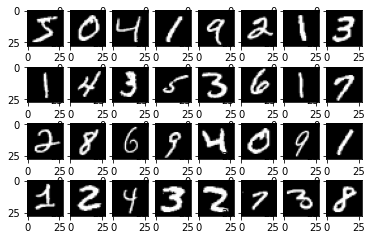

In [3]:
for i in range(0, 32):
    pyplot.subplot(4, 8, i+1)
    pyplot.imshow(X_train[i], cmap='gray')

In [4]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## 굉장히 간단한 신경망으로 MNIST 분류하기

### 1차원 배열로 변환해 정규화하기
- 28x28의 2차원 데이터를 784개의 요소를 갖는 1차원 배열로 변환
- 데이터의 범위를 0.0~1.0으로 정규화하기 위해 255로 나눔

In [5]:
# 1차원으로 변환
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [6]:
# 레이블 데이터를 OHE 형식으로 변환하기
y_train = keras.utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.to_categorical(y_test.astype('int32'), 10)

### Keras로 모델 구축하기

In [7]:
# 입출력 지정
in_size = 28*28
out_size = 10

# 모델 구조 정의
Dense = keras.layers.Dense
model = keras.models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size, )))
model.add(Dense(out_size, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
# 학습하기
hist = model.fit(X_train, y_train,
         batch_size=20, epochs=20)

Epoch 1/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0360 - accuracy: 0.9881
Epoch 2/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0278 - accuracy: 0.9908
Epoch 3/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 4/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0181 - accuracy: 0.9939
Epoch 5/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0172 - accuracy: 0.9945
Epoch 6/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0139 - accuracy: 0.9956
Epoch 7/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0131 - accuracy: 0.9956
Epoch 8/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0118 - accuracy: 0.9958
Epoch 9/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0108 - accuracy: 0.9963
Epoch 10/20
3000/3000 [==============================] - 5s 2ms/step - loss: 0.010

In [14]:
# 모델 평가
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률 :', score[1], 'loss :', score[0])

313/313 [==============================] - 1s 1ms/step - loss: 0.1806 - accuracy: 0.9793
정답률 : 0.9793000221252441 loss : 0.1806328147649765


## MLP를 사용해 MNIST 분류 문제 풀기
- 다층 퍼셉트론(Multilayer Perceptron)
- 여러 개의 은닉 레이어를 거치는 것

### 드롭아웃 - 잊는 것이 정답률을 높이는 방법
- `Dropout()` : 입력된 값에서 일부를 랜덤하게 0으로 설정하는 기능으로 과적합을 방지함

In [15]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 입출력
in_size = 28 * 28
out_size = 10

# MNIST 데이터
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 1차원 배열로 변환
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255

# 레이블 데이터를 OHE 형식으로 변환하기
y_train = keras.utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.to_categorical(y_test.astype('int32'), 10)

In [16]:
# MLP 모델 구조 정의
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size, )))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

In [21]:
# 학습
hist = model.fit(X_train, y_train, batch_size=128,
                epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
469/469 [==============================] - 3s 4ms/step - loss: 0.2396 - accuracy: 0.9257 - val_loss: 0.1143 - val_accuracy: 0.9661
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1017 - accuracy: 0.9698 - val_loss: 0.0880 - val_accuracy: 0.9750
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0751 - accuracy: 0.9776 - val_loss: 0.0808 - val_accuracy: 0.9774
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0595 - accuracy: 0.9822 - val_loss: 0.0785 - val_accuracy: 0.9801
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0483 - accuracy: 0.9852 - val_loss: 0.0725 - val_accuracy: 0.9836
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0444 - accuracy: 0.9863 - val_loss: 0.0773 - val_accuracy: 0.9815
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0375 - accuracy: 0.9887 - val_loss: 0.0868 - val_accuracy: 0.9795
Epoch 

In [22]:
# 모델 평가
score = model.evaluate(X_test, y_test)
print('정답률 :', score[1], 'loss :', score[0])

313/313 [==============================] - 0s 2ms/step - loss: 0.2258 - accuracy: 0.9847
정답률 : 0.9847000241279602 loss : 0.2257600575685501


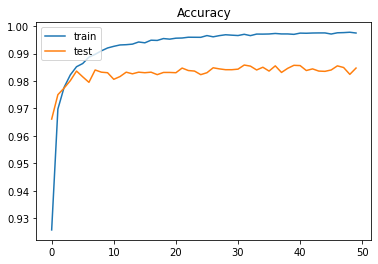

In [24]:
# 학습 상태를 그래프로
# 정답률 추이
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

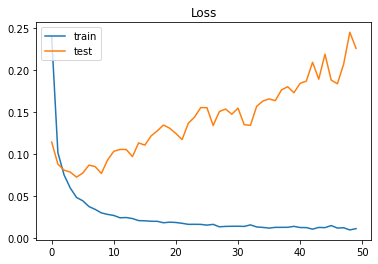

In [25]:
# 손실 추이
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## CNN
- 합성곱 신경망(Convolution Neural Network)
- 합성곱 레이어(Convolution Layer)와 풀링 레이어(Pooling Layer)로 구성된 신경망
- 이미지 분석에 높은 정답률
- 음성 인식, 얼굴 인식, 추천 시스템, 번역 등 다양하게 사용

In [26]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 입출력
im_rows = 28 # 이미지 세로 길이
im_cols = 28 # 이미지 가로 길이
im_color = 1 # 이미지 색공간 / 그레이스케일
in_shape = (im_rows, im_cols, im_color)
out_size = 10

# MNIST 데이터
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 1차원 배열로 변환
X_train = X_train.reshape(-1, im_rows, im_cols, im_color).astype('float32') / 255
X_test = X_test.reshape(-1, im_rows, im_cols, im_color).astype('float32') / 255

# 레이블 데이터를 OHE 형식으로 변환하기
y_train = keras.utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.to_categorical(y_test.astype('int32'), 10)

In [27]:
# CNN 모델 구조 정의
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=in_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [29]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

In [30]:
# 학습
hist = model.fit(X_train, y_train, batch_size=128,
                epochs=12, verbose=1, validation_data=(X_test, y_test))

Epoch 1/12
469/469 [==============================] - 6s 6ms/step - loss: 0.3346 - accuracy: 0.9000 - val_loss: 0.0978 - val_accuracy: 0.9697
Epoch 2/12
469/469 [==============================] - 3s 5ms/step - loss: 0.1333 - accuracy: 0.9608 - val_loss: 0.0687 - val_accuracy: 0.9783
Epoch 3/12
469/469 [==============================] - 3s 5ms/step - loss: 0.1008 - accuracy: 0.9699 - val_loss: 0.0532 - val_accuracy: 0.9820
Epoch 4/12
469/469 [==============================] - 3s 5ms/step - loss: 0.0855 - accuracy: 0.9747 - val_loss: 0.0528 - val_accuracy: 0.9832
Epoch 5/12
469/469 [==============================] - 3s 5ms/step - loss: 0.0749 - accuracy: 0.9783 - val_loss: 0.0489 - val_accuracy: 0.9845
Epoch 6/12
469/469 [==============================] - 3s 5ms/step - loss: 0.0701 - accuracy: 0.9797 - val_loss: 0.0502 - val_accuracy: 0.9839
Epoch 7/12
469/469 [==============================] - 3s 5ms/step - loss: 0.0668 - accuracy: 0.9806 - val_loss: 0.0464 - val_accuracy: 0.9853
Epoch 

In [31]:
# 모델 평가
score = model.evaluate(X_test, y_test)
print('정답률 :', score[1], 'loss :', score[0])

313/313 [==============================] - 1s 2ms/step - loss: 0.0532 - accuracy: 0.9838
정답률 : 0.9837999939918518 loss : 0.05321571230888367


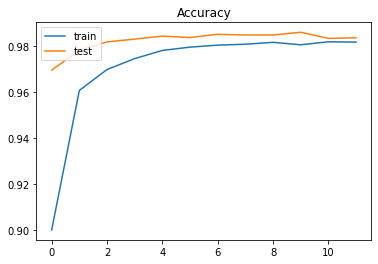

In [32]:
# 학습 상태를 그래프로
# 정답률 추이
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

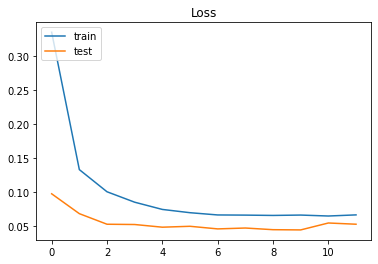

In [33]:
# 손실 추이
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()